## Principal Component Analysis (PCA)

In this notebook, we apply PCA to our feature vectors to find, if it exists, low-dimensional structure in our data.

In [42]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Let's read in our stock returns data, generated in the [data_processing.ipynb] file.

In [43]:
df = pd.read_csv('stock_price_table.csv', index_col=0) 
df.head() 

,2011-07-29,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-30,2012-01-31,2012-02-29,2012-03-30,2012-04-30,...,2014-06-30,2014-07-31,2014-08-29,2014-09-30,2014-10-31,2014-11-28,2014-12-31,2015-01-30,2015-02-27,2015-03-31
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,-0.072285,0.004062,-0.183523,0.217568,-0.099149,0.156057,0.173712,0.055993,-0.002293,0.001724,...,0.094132,0.168626,0.039264,-0.105785,0.214418,-0.027397,0.300022,-0.138263,0.010976,0.086459
10032,-0.152255,-0.099288,-0.148984,0.136163,0.056420,0.008471,0.322863,-0.041966,0.008357,-0.074879,...,0.036638,-0.091476,0.047292,-0.103423,0.119686,-0.056590,0.056396,-0.080563,0.062286,0.012919
10051,-0.141398,-0.106140,0.005857,-0.080466,-0.078872,0.168125,0.048154,0.056151,0.056549,0.077310,...,0.035221,0.006359,-0.292259,-0.083929,0.166179,-0.103636,0.020979,-0.014612,0.199722,-0.123600
10104,-0.068976,-0.082080,0.023869,0.142310,-0.043332,-0.181818,0.102144,0.037044,-0.003247,0.010288,...,-0.035459,-0.000493,0.028225,-0.078257,0.023250,0.086044,0.060363,-0.065822,0.046073,-0.015290
10107,0.053846,-0.023358,-0.064286,0.069908,-0.031919,0.014855,0.137519,0.081612,0.016226,-0.007441,...,0.018564,0.035012,0.059082,0.020471,0.012726,0.024920,-0.028446,-0.130248,0.093069,-0.072862


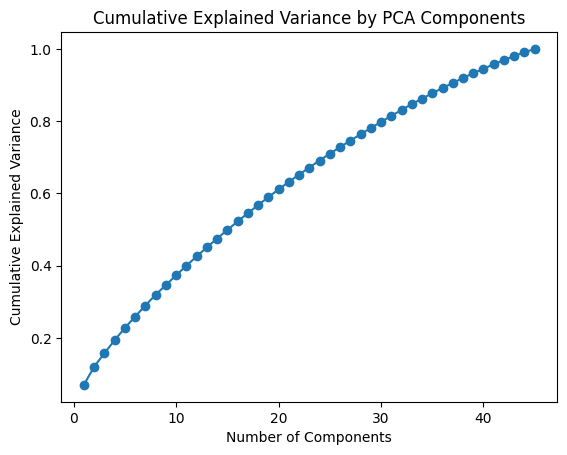

In [44]:
# Standardizing the Data
scaler = StandardScaler()
data_std = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_std)

# Variance explained
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

The linear and steady increase in cumulative explained variance indicates that each additional principal component contributes almost equally to explaining the variance in our data. This is somewhat unusual, as typically in PCA, the first few components explain a larger proportion of the variance, and the contribution of each subsequent component drops off. Simultaneously, however, as we only have 54 features to begin with, this also makes sense, especially as we're dealing with time-series data. Hence, we should not apply PCA to this portion of our feature vector.